## 6.1 パラメータの更新

### 6.1.2 SGD

In [2]:
# SGDの実装
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

### 6.1.4 Momentum

In [3]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

### 6.1.5 Ada Grad

In [4]:
class  AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
    
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            self.params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

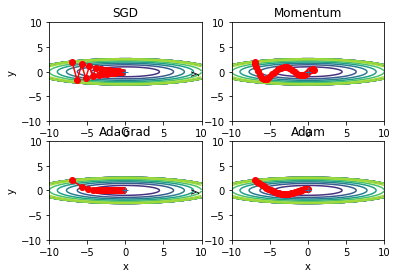

In [10]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.93)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.3)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot 
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

### 6.2.2 隠れ層のアクティベーション分布

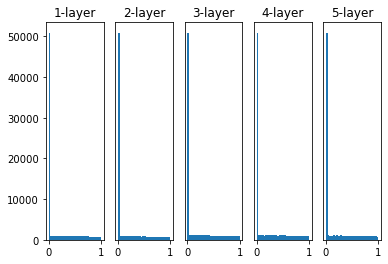

In [30]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    # z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()


### 6.3.2 Batch Normの評価

============== 1/16 ==============
epoch:0 | 0.117 - 0.115
epoch:1 | 0.097 - 0.09
epoch:2 | 0.097 - 0.125

..\common\multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
..\common\multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
..\common\functions.py:32: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=-1, keepdims=True)   # オーバーフロー対策



epoch:3 | 0.097 - 0.14
epoch:4 | 0.097 - 0.157
epoch:5 | 0.097 - 0.176
epoch:6 | 0.097 - 0.191
epoch:7 | 0.097 - 0.206
epoch:8 | 0.097 - 0.218
epoch:9 | 0.097 - 0.232
epoch:10 | 0.097 - 0.25
epoch:11 | 0.097 - 0.271
epoch:12 | 0.097 - 0.281
epoch:13 | 0.097 - 0.293
epoch:14 | 0.097 - 0.314
epoch:15 | 0.097 - 0.324
epoch:16 | 0.097 - 0.338


No handles with labels found to put in legend.


epoch:17 | 0.097 - 0.356
epoch:18 | 0.097 - 0.36
epoch:19 | 0.097 - 0.379
============== 2/16 ==============
epoch:0 | 0.097 - 0.102

..\common\multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
..\common\multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)



epoch:1 | 0.097 - 0.106
epoch:2 | 0.097 - 0.113
epoch:3 | 0.097 - 0.132
epoch:4 | 0.097 - 0.15
epoch:5 | 0.097 - 0.175
epoch:6 | 0.097 - 0.202
epoch:7 | 0.097 - 0.223
epoch:8 | 0.097 - 0.245
epoch:9 | 0.097 - 0.275
epoch:10 | 0.097 - 0.303
epoch:11 | 0.097 - 0.321
epoch:12 | 0.097 - 0.337
epoch:13 | 0.097 - 0.358
epoch:14 | 0.097 - 0.369
epoch:15 | 0.097 - 0.393
epoch:16 | 0.097 - 0.4
epoch:17 | 0.097 - 0.421


No handles with labels found to put in legend.


epoch:18 | 0.097 - 0.437
epoch:19 | 0.097 - 0.447
============== 3/16 ==============
epoch:0 | 0.115 - 0.098
epoch:1 | 0.317 - 0.103
epoch:2 | 0.489 - 0.144
epoch:3 | 0.551 - 0.186
epoch:4 | 0.63 - 0.227
epoch:5 | 0.691 - 0.269
epoch:6 | 0.739 - 0.308
epoch:7 | 0.773 - 0.342
epoch:8 | 0.796 - 0.367
epoch:9 | 0.827 - 0.404
epoch:10 | 0.848 - 0.449
epoch:11 | 0.869 - 0.465
epoch:12 | 0.893 - 0.498
epoch:13 | 0.914 - 0.522
epoch:14 | 0.926 - 0.543
epoch:15 | 0.927 - 0.566
epoch:16 | 0.947 - 0.572
epoch:17 | 0.95 - 0.593
epoch:18 | 0.953 - 0.619


No handles with labels found to put in legend.


epoch:19 | 0.958 - 0.634
============== 4/16 ==============
epoch:0 | 0.141 - 0.093
epoch:1 | 0.177 - 0.128
epoch:2 | 0.332 - 0.191
epoch:3 | 0.461 - 0.274
epoch:4 | 0.553 - 0.33
epoch:5 | 0.617 - 0.38
epoch:6 | 0.654 - 0.451
epoch:7 | 0.701 - 0.503
epoch:8 | 0.721 - 0.553
epoch:9 | 0.738 - 0.606
epoch:10 | 0.759 - 0.645
epoch:11 | 0.777 - 0.669
epoch:12 | 0.796 - 0.69
epoch:13 | 0.793 - 0.706
epoch:14 | 0.815 - 0.724
epoch:15 | 0.812 - 0.747
epoch:16 | 0.832 - 0.759


No handles with labels found to put in legend.


epoch:17 | 0.842 - 0.776
epoch:18 | 0.842 - 0.783
epoch:19 | 0.848 - 0.792
============== 5/16 ==============
epoch:0 | 0.125 - 0.065
epoch:1 | 0.131 - 0.121
epoch:2 | 0.14 - 0.326
epoch:3 | 0.144 - 0.473
epoch:4 | 0.157 - 0.553
epoch:5 | 0.168 - 0.608
epoch:6 | 0.176 - 0.67
epoch:7 | 0.182 - 0.708
epoch:8 | 0.196 - 0.734
epoch:9 | 0.205 - 0.76
epoch:10 | 0.212 - 0.773
epoch:11 | 0.226 - 0.799
epoch:12 | 0.239 - 0.817
epoch:13 | 0.24 - 0.822
epoch:14 | 0.247 - 0.834
epoch:15 | 0.252 - 0.848
epoch:16 | 0.253 - 0.856
epoch:17 | 0.262 - 0.862
epoch:18 | 0.271 - 0.869
epoch:19 | 0.282 - 0.879


No handles with labels found to put in legend.


============== 6/16 ==============
epoch:0 | 0.092 - 0.168
epoch:1 | 0.104 - 0.268
epoch:2 | 0.151 - 0.421
epoch:3 | 0.174 - 0.532
epoch:4 | 0.163 - 0.618
epoch:5 | 0.176 - 0.677
epoch:6 | 0.174 - 0.719
epoch:7 | 0.184 - 0.753
epoch:8 | 0.133 - 0.783
epoch:9 | 0.184 - 0.811
epoch:10 | 0.171 - 0.823
epoch:11 | 0.181 - 0.855
epoch:12 | 0.192 - 0.876
epoch:13 | 0.165 - 0.887
epoch:14 | 0.125 - 0.899
epoch:15 | 0.117 - 0.914
epoch:16 | 0.117 - 0.926
epoch:17 | 0.117 - 0.926
epoch:18 | 0.117 - 0.935
epoch:19 | 0.117 - 0.941


No handles with labels found to put in legend.


============== 7/16 ==============
epoch:0 | 0.117 - 0.131
epoch:1 | 0.1 - 0.292
epoch:2 | 0.117 - 0.617
epoch:3 | 0.116 - 0.741
epoch:4 | 0.116 - 0.796
epoch:5 | 0.116 - 0.82
epoch:6 | 0.116 - 0.843
epoch:7 | 0.116 - 0.872
epoch:8 | 0.156 - 0.885
epoch:9 | 0.116 - 0.912
epoch:10 | 0.116 - 0.931
epoch:11 | 0.116 - 0.945
epoch:12 | 0.116 - 0.954
epoch:13 | 0.116 - 0.963
epoch:14 | 0.116 - 0.969
epoch:15 | 0.116 - 0.975
epoch:16 | 0.116 - 0.986
epoch:17 | 0.116 - 0.993
epoch:18 | 0.116 - 0.991


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.989
============== 8/16 ==============
epoch:0 | 0.12 - 0.098
epoch:1 | 0.116 - 0.362
epoch:2 | 0.116 - 0.651
epoch:3 | 0.117 - 0.794
epoch:4 | 0.117 - 0.83
epoch:5 | 0.117 - 0.864
epoch:6 | 0.117 - 0.901
epoch:7 | 0.117 - 0.923
epoch:8 | 0.116 - 0.944
epoch:9 | 0.116 - 0.963
epoch:10 | 0.116 - 0.972
epoch:11 | 0.116 - 0.987
epoch:12 | 0.116 - 0.991
epoch:13 | 0.116 - 0.994
epoch:14 | 0.116 - 0.995
epoch:15 | 0.116 - 0.999
epoch:16 | 0.116 - 0.999


No handles with labels found to put in legend.


epoch:17 | 0.116 - 0.999
epoch:18 | 0.116 - 1.0
epoch:19 | 0.117 - 1.0
============== 9/16 ==============
epoch:0 | 0.097 - 0.118
epoch:1 | 0.117 - 0.522
epoch:2 | 0.117 - 0.719
epoch:3 | 0.117 - 0.8
epoch:4 | 0.117 - 0.857
epoch:5 | 0.117 - 0.891
epoch:6 | 0.117 - 0.95
epoch:7 | 0.117 - 0.973
epoch:8 | 0.117 - 0.986
epoch:9 | 0.117 - 0.99
epoch:10 | 0.117 - 0.993
epoch:11 | 0.117 - 0.996
epoch:12 | 0.117 - 0.998
epoch:13 | 0.117 - 0.999
epoch:14 | 0.117 - 0.999
epoch:15 | 0.117 - 0.999
epoch:16 | 0.117 - 0.999
epoch:17 | 0.117 - 0.999


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.999
epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.092 - 0.16
epoch:1 | 0.116 - 0.587
epoch:2 | 0.116 - 0.829
epoch:3 | 0.117 - 0.864
epoch:4 | 0.117 - 0.878
epoch:5 | 0.117 - 0.938
epoch:6 | 0.116 - 0.97
epoch:7 | 0.116 - 0.955
epoch:8 | 0.116 - 0.975
epoch:9 | 0.116 - 0.985
epoch:10 | 0.116 - 0.999
epoch:11 | 0.116 - 0.987
epoch:12 | 0.116 - 0.995
epoch:13 | 0.117 - 0.997
epoch:14 | 0.117 - 0.997
epoch:15 | 0.117 - 0.997
epoch:16 | 0.117 - 0.998
epoch:17 | 0.117 - 0.997
epoch:18 | 0.117 - 0.999


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.999
============== 11/16 ==============
epoch:0 | 0.116 - 0.143
epoch:1 | 0.116 - 0.61
epoch:2 | 0.116 - 0.701
epoch:3 | 0.116 - 0.821
epoch:4 | 0.117 - 0.813
epoch:5 | 0.117 - 0.835
epoch:6 | 0.117 - 0.863
epoch:7 | 0.117 - 0.889
epoch:8 | 0.117 - 0.896
epoch:9 | 0.117 - 0.896
epoch:10 | 0.117 - 0.98
epoch:11 | 0.117 - 0.982
epoch:12 | 0.117 - 0.987
epoch:13 | 0.117 - 0.97
epoch:14 | 0.117 - 0.98
epoch:15 | 0.117 - 0.991
epoch:16 | 0.117 - 0.994


No handles with labels found to put in legend.


epoch:17 | 0.117 - 0.995
epoch:18 | 0.116 - 0.996
epoch:19 | 0.117 - 0.996
============== 12/16 ==============
epoch:0 | 0.097 - 0.097
epoch:1 | 0.116 - 0.479
epoch:2 | 0.117 - 0.568
epoch:3 | 0.105 - 0.628
epoch:4 | 0.105 - 0.65
epoch:5 | 0.117 - 0.66
epoch:6 | 0.116 - 0.68
epoch:7 | 0.116 - 0.685
epoch:8 | 0.117 - 0.687
epoch:9 | 0.117 - 0.781
epoch:10 | 0.117 - 0.8
epoch:11 | 0.117 - 0.775
epoch:12 | 0.117 - 0.793
epoch:13 | 0.117 - 0.85
epoch:14 | 0.117 - 0.893
epoch:15 | 0.117 - 0.889
epoch:16 | 0.117 - 0.9
epoch:17 | 0.117 - 0.897


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.898
epoch:19 | 0.117 - 0.899
============== 13/16 ==============
epoch:0 | 0.116 - 0.174
epoch:1 | 0.116 - 0.405
epoch:2 | 0.117 - 0.484
epoch:3 | 0.117 - 0.586
epoch:4 | 0.117 - 0.584
epoch:5 | 0.117 - 0.575
epoch:6 | 0.116 - 0.602
epoch:7 | 0.116 - 0.608
epoch:8 | 0.116 - 0.61
epoch:9 | 0.116 - 0.61
epoch:10 | 0.117 - 0.614
epoch:11 | 0.116 - 0.612
epoch:12 | 0.116 - 0.617
epoch:13 | 0.116 - 0.608
epoch:14 | 0.116 - 0.614
epoch:15 | 0.116 - 0.619
epoch:16 | 0.116 - 0.621
epoch:17 | 0.116 - 0.628
epoch:18 | 0.116 - 0.632


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.71
============== 14/16 ==============
epoch:0 | 0.116 - 0.099
epoch:1 | 0.116 - 0.305
epoch:2 | 0.117 - 0.366
epoch:3 | 0.117 - 0.47
epoch:4 | 0.116 - 0.287
epoch:5 | 0.117 - 0.487
epoch:6 | 0.117 - 0.508
epoch:7 | 0.117 - 0.507
epoch:8 | 0.117 - 0.518
epoch:9 | 0.117 - 0.522
epoch:10 | 0.117 - 0.525
epoch:11 | 0.117 - 0.526
epoch:12 | 0.117 - 0.533
epoch:13 | 0.117 - 0.587
epoch:14 | 0.117 - 0.59
epoch:15 | 0.117 - 0.604
epoch:16 | 0.117 - 0.602
epoch:17 | 0.117 - 0.609
epoch:18 | 0.117 - 0.619
epoch:19 | 0.117 - 0.616

No handles with labels found to put in legend.



============== 15/16 ==============
epoch:0 | 0.116 - 0.093
epoch:1 | 0.117 - 0.421
epoch:2 | 0.116 - 0.477
epoch:3 | 0.116 - 0.507
epoch:4 | 0.117 - 0.499
epoch:5 | 0.117 - 0.505
epoch:6 | 0.117 - 0.504
epoch:7 | 0.117 - 0.517
epoch:8 | 0.117 - 0.518
epoch:9 | 0.117 - 0.516
epoch:10 | 0.117 - 0.515
epoch:11 | 0.117 - 0.522
epoch:12 | 0.117 - 0.521
epoch:13 | 0.117 - 0.611
epoch:14 | 0.117 - 0.583
epoch:15 | 0.117 - 0.61
epoch:16 | 0.117 - 0.513
epoch:17 | 0.117 - 0.609
epoch:18 | 0.117 - 0.59


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.615
============== 16/16 ==============
epoch:0 | 0.117 - 0.296
epoch:1 | 0.117 - 0.306
epoch:2 | 0.117 - 0.449
epoch:3 | 0.116 - 0.419
epoch:4 | 0.117 - 0.427
epoch:5 | 0.117 - 0.586
epoch:6 | 0.117 - 0.576
epoch:7 | 0.117 - 0.601
epoch:8 | 0.117 - 0.592
epoch:9 | 0.117 - 0.593
epoch:10 | 0.117 - 0.604
epoch:11 | 0.117 - 0.587
epoch:12 | 0.117 - 0.615
epoch:13 | 0.117 - 0.612
epoch:14 | 0.117 - 0.613
epoch:15 | 0.117 - 0.623
epoch:16 | 0.117 - 0.619
epoch:17 | 0.117 - 0.626
epoch:18 | 0.117 - 0.617
epoch:19 | 0.117 - 0.62


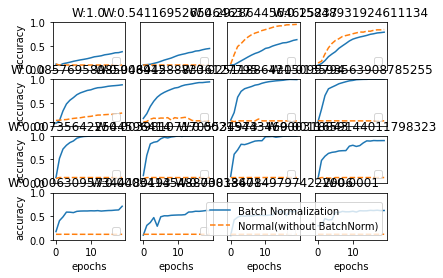

In [31]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 学習データを削減
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 3.グラフの描画==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

epoch:0, train acc:0.12666666666666668, test acc:0.1168
epoch:10, train acc:0.39, test acc:0.2854
epoch:20, train acc:0.54, test acc:0.4033
epoch:30, train acc:0.6166666666666667, test acc:0.4634
epoch:40, train acc:0.74, test acc:0.5483
epoch:50, train acc:0.7766666666666666, test acc:0.5952
epoch:60, train acc:0.8166666666666667, test acc:0.6296
epoch:70, train acc:0.8733333333333333, test acc:0.6653
epoch:80, train acc:0.8833333333333333, test acc:0.6898
epoch:90, train acc:0.9066666666666666, test acc:0.7086
epoch:100, train acc:0.9033333333333333, test acc:0.6981
epoch:110, train acc:0.91, test acc:0.7218
epoch:120, train acc:0.8933333333333333, test acc:0.7053
epoch:130, train acc:0.92, test acc:0.7202
epoch:140, train acc:0.9333333333333333, test acc:0.7315
epoch:150, train acc:0.9333333333333333, test acc:0.733
epoch:160, train acc:0.93, test acc:0.7249
epoch:170, train acc:0.9133333333333333, test acc:0.7321
epoch:180, train acc:0.9266666666666666, test acc:0.734
epoch:190, tr

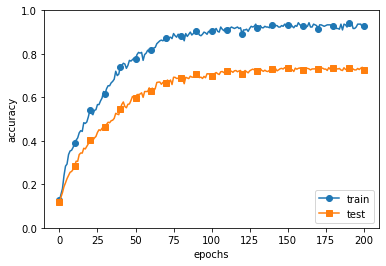

In [38]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        if epoch_cnt % 10 == 0:
            print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [39]:
mask = None

In [41]:
print(mask)

None


In [42]:
dout = 1.0
dout * mask

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'